## Building a Credit Scoring Model for Buy-Now-Pay-Later Services: A Comprehensive Analysis of Credit Risk Classification

## Overview
Credit scoring models are vital tools used by financial institutions to assess the creditworthiness of potential borrowers. As part of risk management, these models predict the likelihood of a borrower defaulting on a loan, which allows institutions to mitigate potential losses. Traditionally, credit scoring models rely on statistical methods to analyze historical data, identifying patterns and relationships between borrower behavior and loan outcomes.

In this challenge, we aim to build a comprehensive credit scoring model for Bati Bank, a leading financial institution collaborating with an eCommerce platform. The goal is to enhance their buy-now-pay-later service, allowing customers to purchase items on credit, based on their predicted creditworthiness. By developing a reliable and robust credit scoring model, Bati Bank can make informed lending decisions while minimizing the risk of defaults. This project involves data exploration, feature engineering, model development, and real-time deployment of the model via an API to assess credit risk and optimize loan terms.

## Objectives
The primary objectives of this project are as follows:

1. Define Credit Risk Proxy: Establish a proxy variable to categorize users as high-risk (bad) or low-risk (good) based on their likelihood of default.

2. Feature Engineering: Select relevant features from the data and engineer new ones that are strong predictors of default risk. This includes creating aggregate and extracted features, encoding categorical variables, handling missing data, and normalizing numerical features.

3. Develop a Credit Risk Model: Build and train machine learning models that assign risk probabilities to new customers based on historical transaction data.

4. Credit Scoring: Use the model's probability estimates to create a credit score for each customer, facilitating quick and accurate creditworthiness assessments.

5. Loan Optimization: Predict the optimal loan amount and duration for new customers, considering their risk profile to ensure sustainable lending practices.

6. Model Deployment: Deploy the trained credit scoring model through an API, enabling real-time credit scoring and decision-making. The API will accept customer transaction data and return predictions on credit risk and loan recommendations.

## 1. Data Collection

#### 1.1 Import Library

In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#### 1.2 Load dataset

In [2]:
df = pd.read_csv('../data/data.csv')

In [3]:
df

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-11-15T02:18:49Z,2,0
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2018-11-15T02:19:08Z,2,0
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2018-11-15T02:44:21Z,2,0
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,2018-11-15T03:32:55Z,2,0
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2018-11-15T03:34:21Z,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95657,TransactionId_89881,BatchId_96668,AccountId_4841,SubscriptionId_3829,CustomerId_3078,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-1000.0,1000,2019-02-13T09:54:09Z,2,0
95658,TransactionId_91597,BatchId_3503,AccountId_3439,SubscriptionId_2643,CustomerId_3874,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2019-02-13T09:54:25Z,2,0
95659,TransactionId_82501,BatchId_118602,AccountId_4841,SubscriptionId_3829,CustomerId_3874,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2019-02-13T09:54:35Z,2,0
95660,TransactionId_136354,BatchId_70924,AccountId_1346,SubscriptionId_652,CustomerId_1709,UGX,256,ProviderId_6,ProductId_19,tv,ChannelId_3,3000.0,3000,2019-02-13T10:01:10Z,2,0


### 1.3. Understanding Dataset

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95662 entries, 0 to 95661
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   TransactionId         95662 non-null  object 
 1   BatchId               95662 non-null  object 
 2   AccountId             95662 non-null  object 
 3   SubscriptionId        95662 non-null  object 
 4   CustomerId            95662 non-null  object 
 5   CurrencyCode          95662 non-null  object 
 6   CountryCode           95662 non-null  int64  
 7   ProviderId            95662 non-null  object 
 8   ProductId             95662 non-null  object 
 9   ProductCategory       95662 non-null  object 
 10  ChannelId             95662 non-null  object 
 11  Amount                95662 non-null  float64
 12  Value                 95662 non-null  int64  
 13  TransactionStartTime  95662 non-null  object 
 14  PricingStrategy       95662 non-null  int64  
 15  FraudResult        

In [5]:
df.columns

Index(['TransactionId', 'BatchId', 'AccountId', 'SubscriptionId', 'CustomerId',
       'CurrencyCode', 'CountryCode', 'ProviderId', 'ProductId',
       'ProductCategory', 'ChannelId', 'Amount', 'Value',
       'TransactionStartTime', 'PricingStrategy', 'FraudResult'],
      dtype='object')

## 2. Exploratory Data Analysis (EDA)

### 2.1 Overview of the Data

In [6]:
# Check the structure of the dataset (rows, columns, and data types)
def dataset_overview(df):
    print("Overview of the Dataset:")
    print(f"Number of rows: {df.shape[0]}")
    print(f"Number of columns: {df.shape[1]}")
    print("\nData types of each column:")
    print(df.dtypes)
    print("\nFirst few rows of the dataset:")
    print(df.head())

dataset_overview(df)

Overview of the Dataset:
Number of rows: 95662
Number of columns: 16

Data types of each column:
TransactionId            object
BatchId                  object
AccountId                object
SubscriptionId           object
CustomerId               object
CurrencyCode             object
CountryCode               int64
ProviderId               object
ProductId                object
ProductCategory          object
ChannelId                object
Amount                  float64
Value                     int64
TransactionStartTime     object
PricingStrategy           int64
FraudResult               int64
dtype: object

First few rows of the dataset:
         TransactionId         BatchId       AccountId       SubscriptionId  \
0  TransactionId_76871   BatchId_36123  AccountId_3957   SubscriptionId_887   
1  TransactionId_73770   BatchId_15642  AccountId_4841  SubscriptionId_3829   
2  TransactionId_26203   BatchId_53941  AccountId_4229   SubscriptionId_222   
3    TransactionId_380  Batch

### 2.2 Summary Statistics

In [7]:
# Central tendency, dispersion, and shape of the data distribution
def summary_statistics(df):
    print("\nSummary Statistics:")
    print(df.describe())  # This gives summary statistics like mean, median, std, etc.
    
    # For categorical columns, use value counts
    print("\nValue counts for categorical variables:")
    categorical_cols = df.select_dtypes(include=['object']).columns
    for col in categorical_cols:
        print(f"\n{col}:")
        print(df[col].value_counts())

summary_statistics(df)


Summary Statistics:
       CountryCode        Amount         Value  PricingStrategy   FraudResult
count      95662.0  9.566200e+04  9.566200e+04     95662.000000  95662.000000
mean         256.0  6.717846e+03  9.900584e+03         2.255974      0.002018
std            0.0  1.233068e+05  1.231221e+05         0.732924      0.044872
min          256.0 -1.000000e+06  2.000000e+00         0.000000      0.000000
25%          256.0 -5.000000e+01  2.750000e+02         2.000000      0.000000
50%          256.0  1.000000e+03  1.000000e+03         2.000000      0.000000
75%          256.0  2.800000e+03  5.000000e+03         2.000000      0.000000
max          256.0  9.880000e+06  9.880000e+06         4.000000      1.000000

Value counts for categorical variables:

TransactionId:
TransactionId
TransactionId_76871     1
TransactionId_74922     1
TransactionId_2737      1
TransactionId_28101     1
TransactionId_33267     1
                       ..
TransactionId_32860     1
TransactionId_139405    

### 2.3 Distribution of Numerical Features

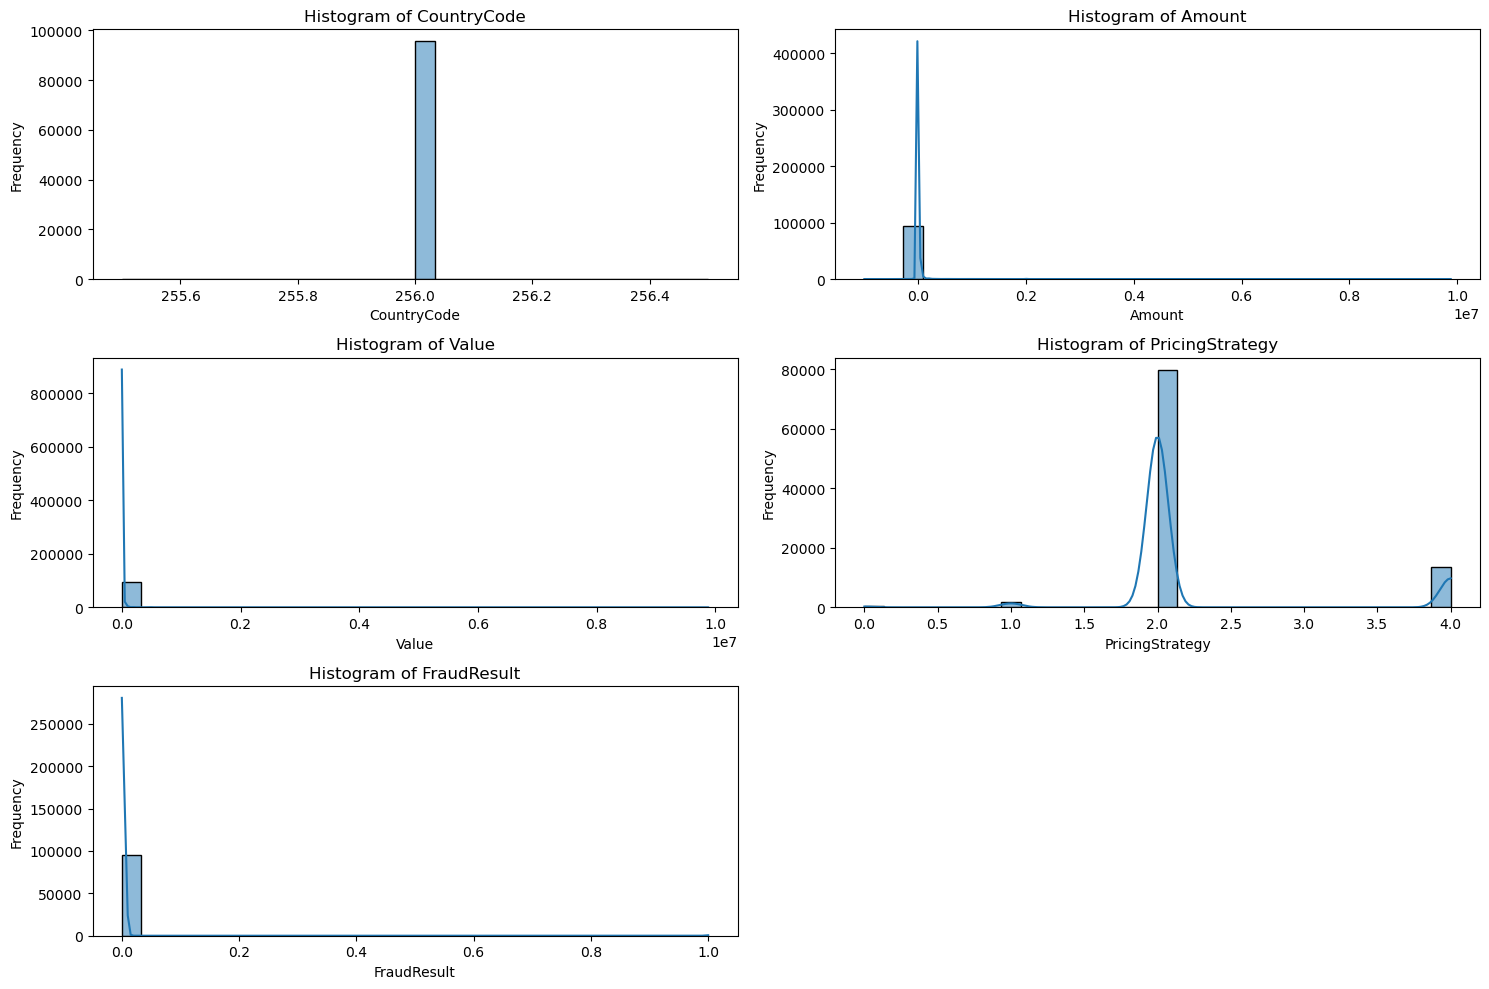

In [8]:
# Plot histograms for numerical features
def plot_numerical_histograms(df):
    numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
    plt.figure(figsize=(15, 10))
    for i, col in enumerate(numerical_cols, 1):
        plt.subplot(3, 2, i)  # Adjust number of rows and columns based on numerical columns
        sns.histplot(df[col], bins=30, kde=True)  # Using kde to add a kernel density estimate
        plt.title(f'Histogram of {col}')
        plt.xlabel(col)
        plt.ylabel('Frequency')
    plt.tight_layout()
    plt.savefig('plots/numerical_histograms.png', dpi=300) 
    plt.show()
    plt.close()
plot_numerical_histograms(df)

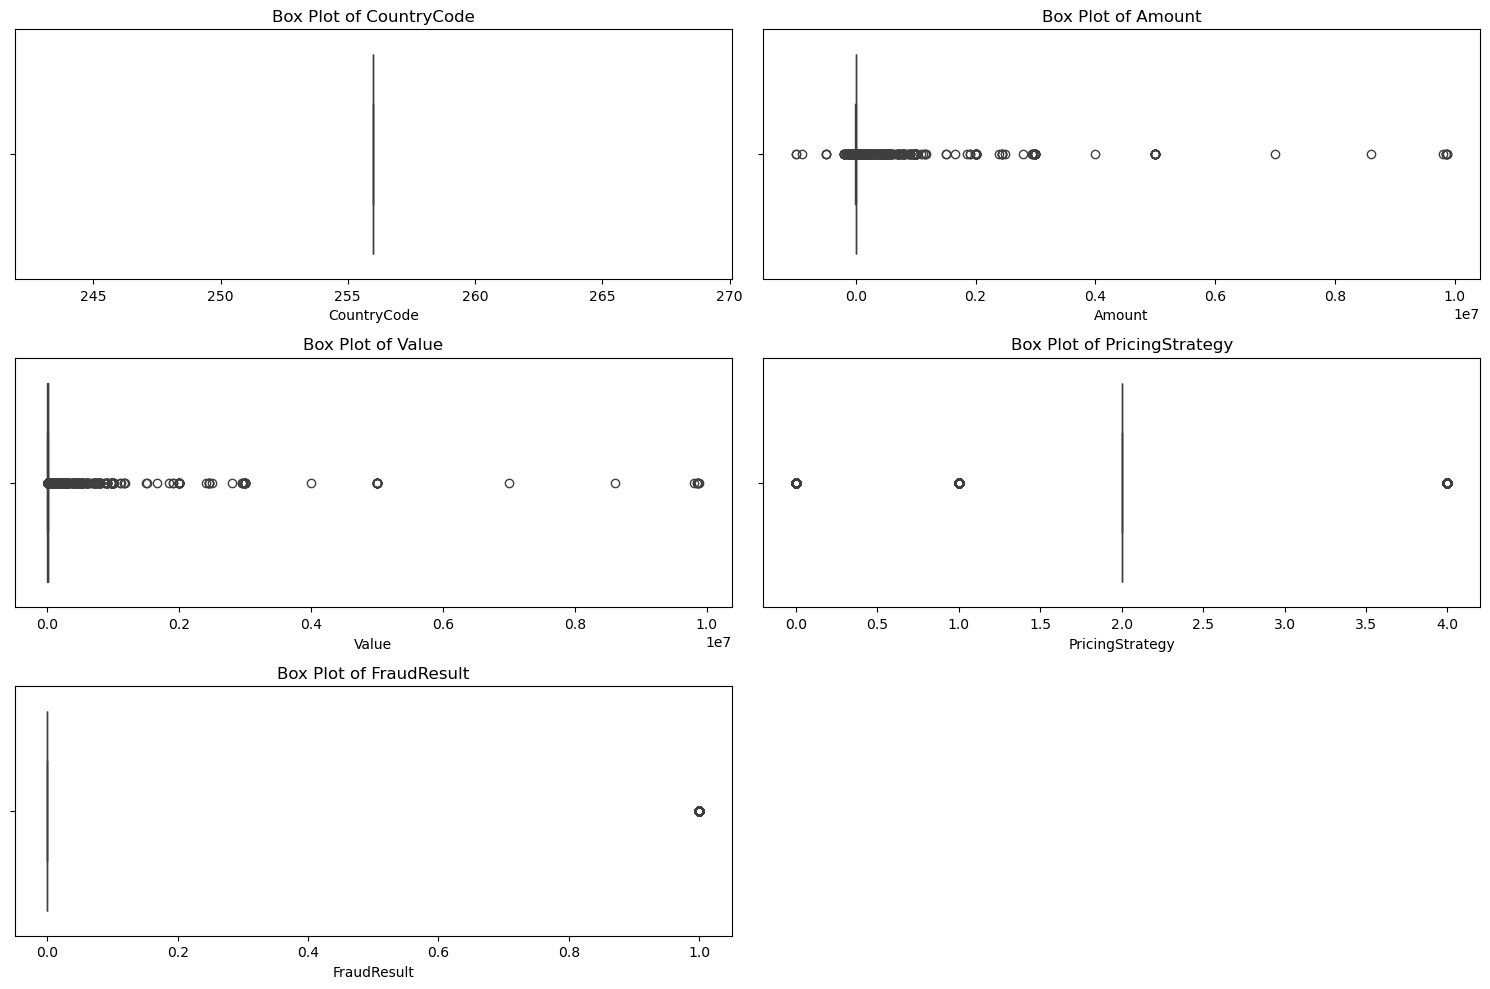

In [9]:
# Plot box plots for numerical features
def plot_numerical_boxplots(df):
    numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
    plt.figure(figsize=(15, 10))
    for i, col in enumerate(numerical_cols, 1):
        plt.subplot(3, 2, i)  # Adjust number of rows and columns based on numerical columns
        sns.boxplot(data=df, x=col)
        plt.title(f'Box Plot of {col}')
    plt.tight_layout()
    plt.savefig('plots/box_plot_numerical_feature.png', dpi=300) 
    plt.show()
    plt.close()
plot_numerical_boxplots(df)

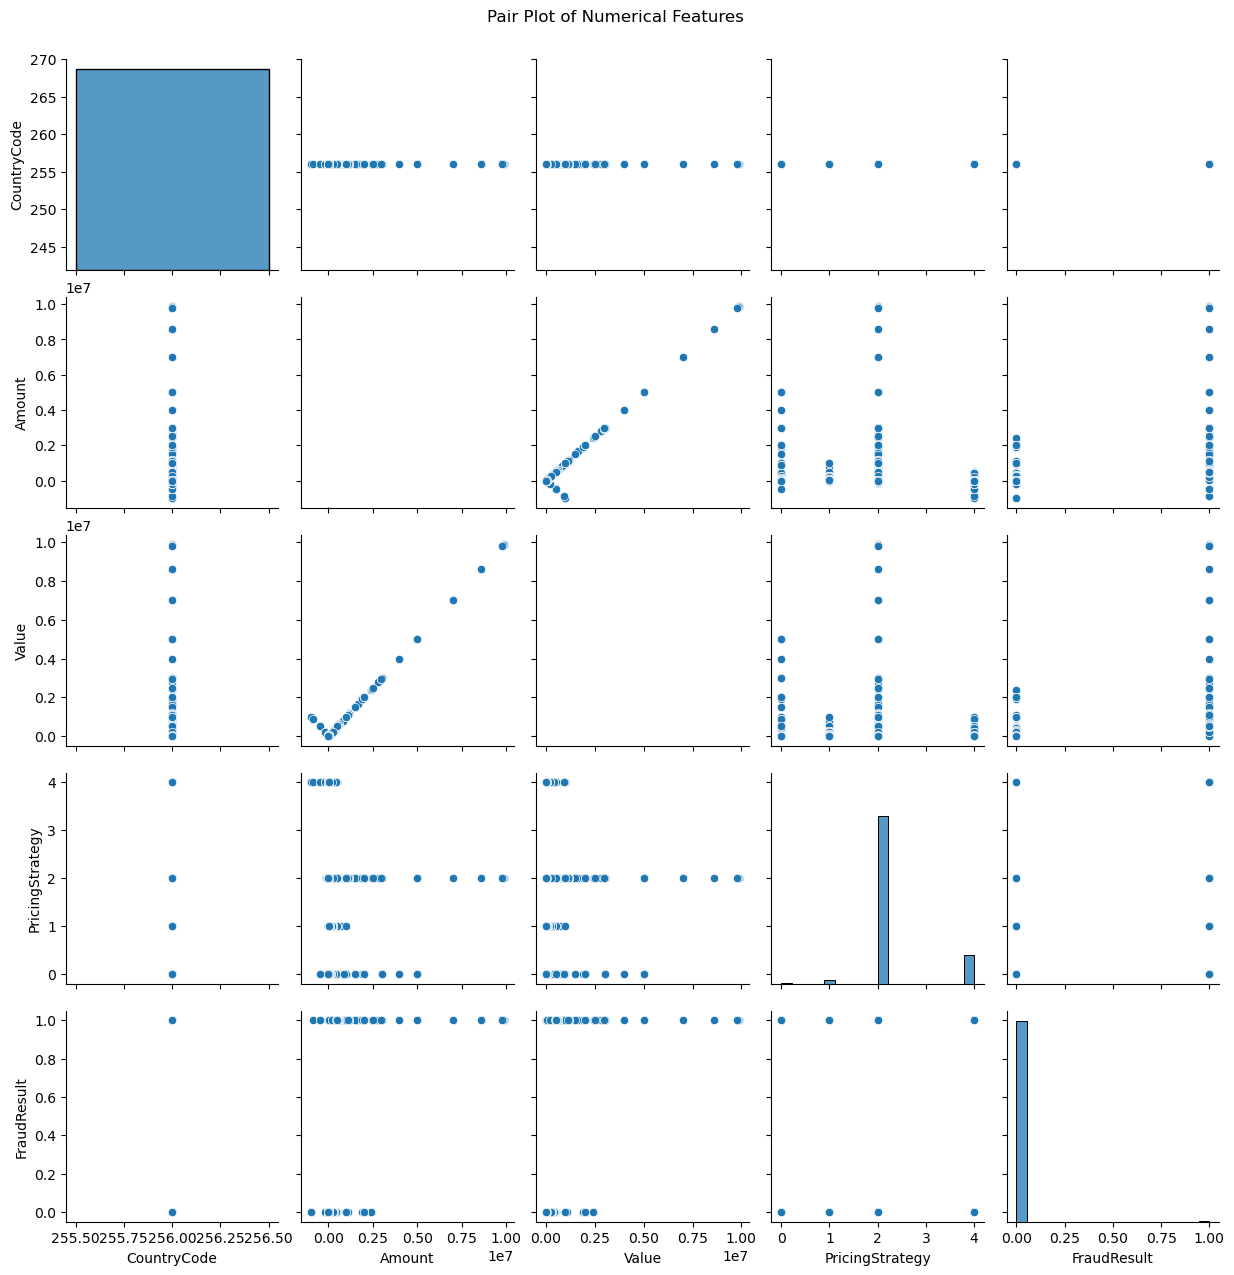

In [10]:
# Pair plots to visualize relationships between numerical features
def plot_pairplots(df):
    numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
    sns.pairplot(df[numerical_cols])
    plt.suptitle('Pair Plot of Numerical Features', y=1.02)
    plt.savefig('plots/rel_bet_numerical_feature.png', dpi=300) 

    plt.show()
    plt.close()
plot_pairplots(df)


### 2.4 Distribution of Categorical Features

C:\Users\getac\AppData\Local\Temp\ipykernel_12112\1420804231.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=col, data=df, order=df[col].value_counts().index, palette='viridis', ax=axes[i])
C:\Users\getac\AppData\Local\Temp\ipykernel_12112\1420804231.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=col, data=df, order=df[col].value_counts().index, palette='viridis', ax=axes[i])
C:\Users\getac\AppData\Local\Temp\ipykernel_12112\1420804231.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=col, data=df, order=df[col].value_

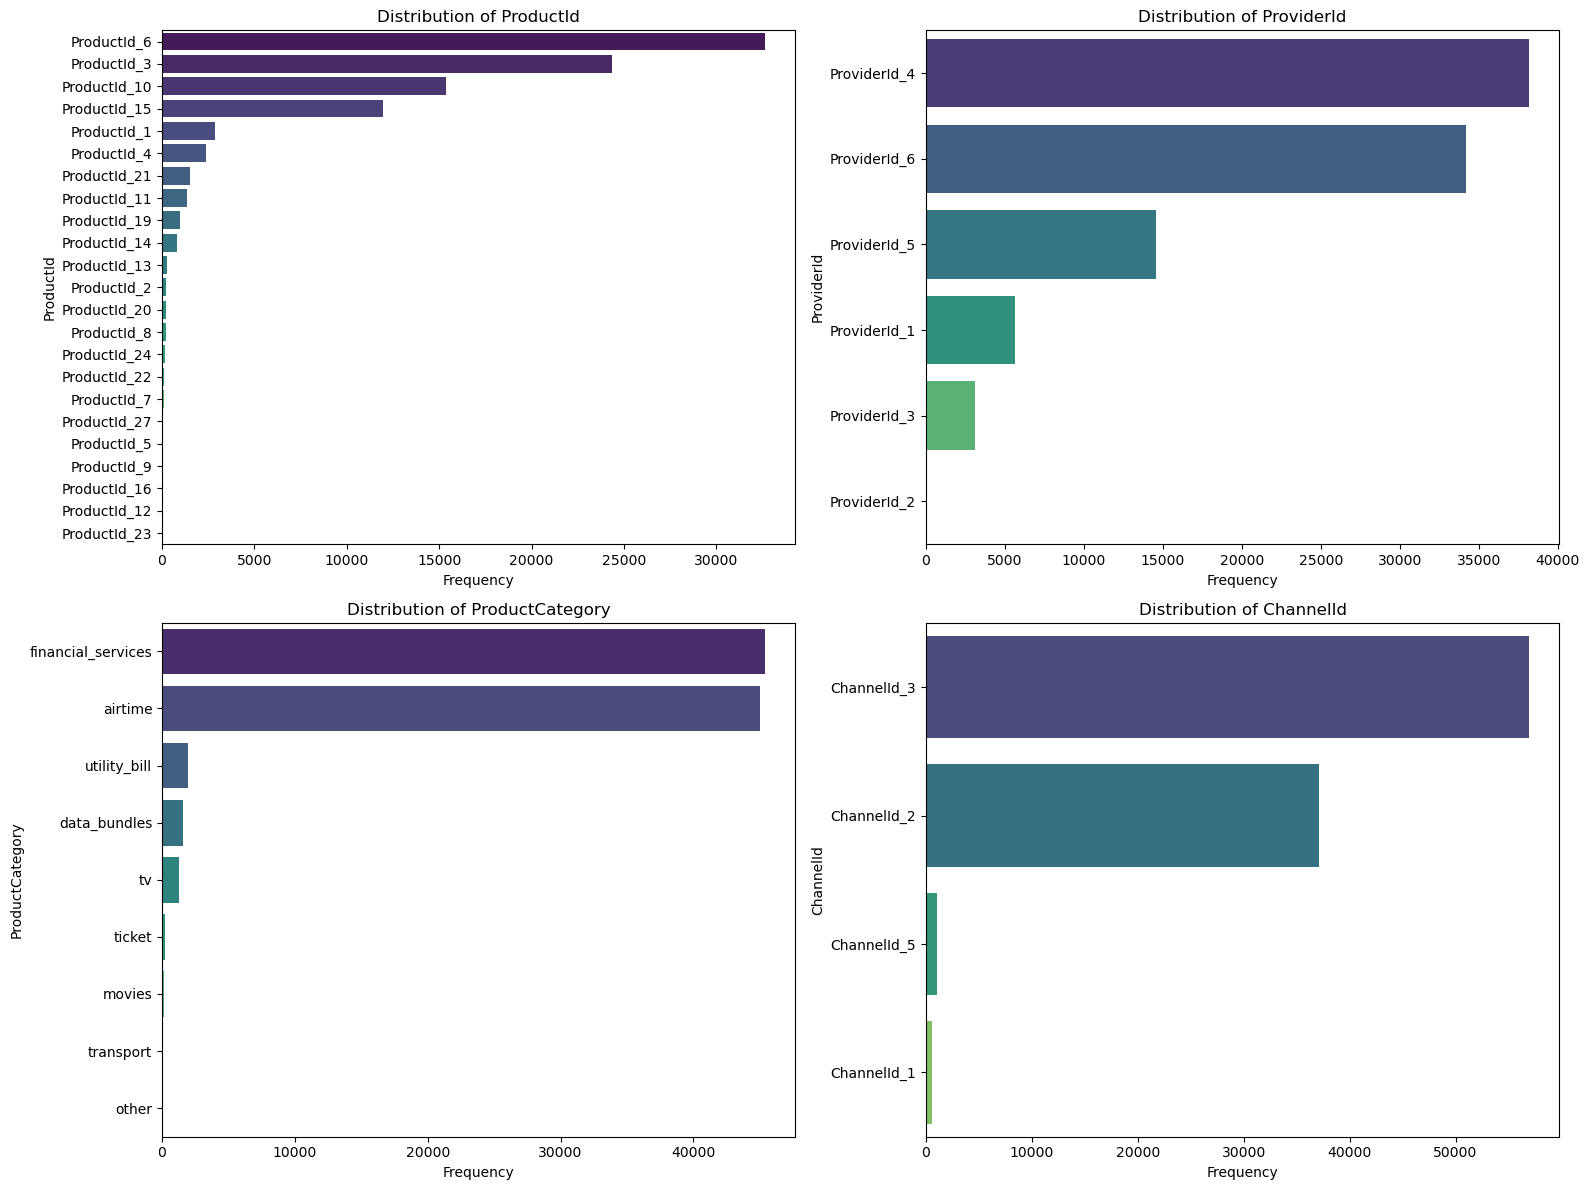

In [11]:
def plot_categorical_distributions(df, columns_to_plot, save_path):
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    axes = axes.flatten()
    
    for i, col in enumerate(columns_to_plot):
        sns.countplot(y=col, data=df, order=df[col].value_counts().index, palette='viridis', ax=axes[i])
        axes[i].set_title(f'Distribution of {col}')
        axes[i].set_xlabel('Frequency')
        axes[i].set_ylabel(col)

    plt.tight_layout()
    os.makedirs(os.path.dirname(save_path), exist_ok=True)
    plt.savefig(save_path)
    plt.show()
columns_to_plot = ['ProductId', 'ProviderId', 'ProductCategory', 'ChannelId']
plot_categorical_distributions(df, columns_to_plot, 'plots/categorical_distributions.png')


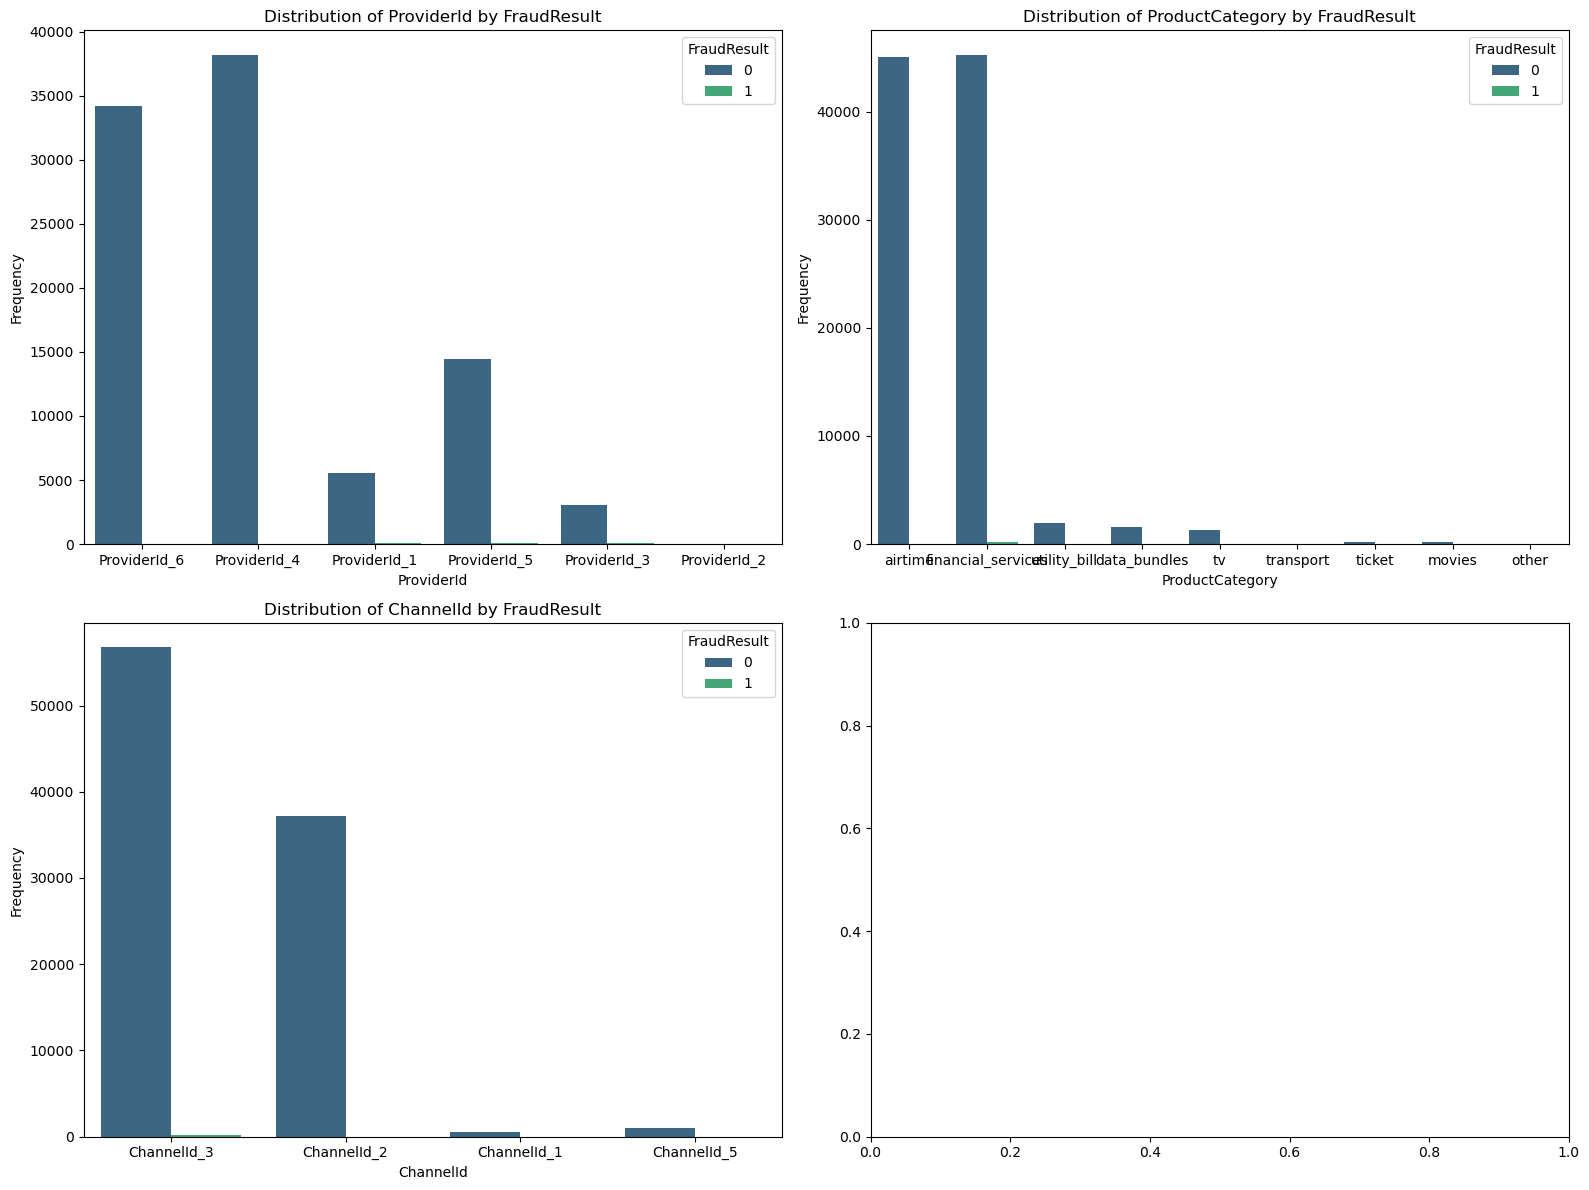

In [12]:
def plot_categorical_vs_target(df, target_col='FraudResult', columns_to_plot=None, save_path='/plots/'):
    if columns_to_plot is None:
        columns_to_plot = df.select_dtypes(include=['object']).columns

    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    axes = axes.flatten()
    
    for i, col in enumerate(columns_to_plot):
        sns.countplot(x=col, hue=target_col, data=df, palette='viridis', ax=axes[i])
        axes[i].set_title(f'Distribution of {col} by {target_col}')
        axes[i].set_xlabel(col)
        axes[i].set_ylabel('Frequency')
        axes[i].legend(title=target_col)

    plt.tight_layout()
    plt.savefig(os.path.join(save_path, 'categorical_vs_fraud_result.png'))
    plt.show()
    plt.close()

columns_to_plot = ['ProviderId', 'ProductCategory', 'ChannelId']
plot_categorical_vs_target(df, target_col='FraudResult', columns_to_plot=columns_to_plot)


### 2.5 Correlation Analysis

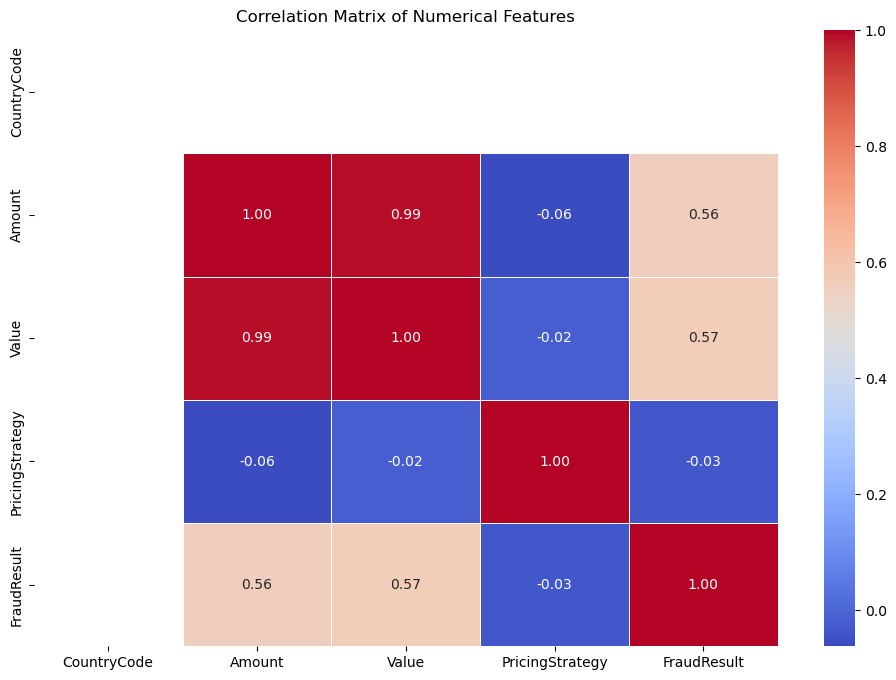

In [13]:
# Analyzing the correlation between numerical features using a correlation matrix and heatmap
def correlation_analysis(df):
    numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
    
    # Create a correlation matrix
    correlation_matrix = df[numerical_cols].corr()
    
    # Plot heatmap
    plt.figure(figsize=(12, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
    plt.title('Correlation Matrix of Numerical Features')
    plt.savefig('plots/correlation.png', dpi=300) 

    plt.show()
    plt.close()

correlation_analysis(df)

### 2.6 Identify Missing Values

In [14]:
# Function to identify missing values and display them in a table
def identify_missing_values(df):
    missing_values = df.isnull().sum()
    missing_values_percentage = (missing_values / len(df)) * 100
    missing_values_table = pd.DataFrame({
        'Missing Values': missing_values,
        'Percentage (%)': missing_values_percentage
    })
    
    # Filter out columns with missing values
    missing_values_table = missing_values_table[missing_values_table['Missing Values'] > 0]
    
    print("Missing Values in the Dataset:")
    print(missing_values_table)

identify_missing_values(df)

Missing Values in the Dataset:
Empty DataFrame
Columns: [Missing Values, Percentage (%)]
Index: []


### 2.7 Outlier Detection

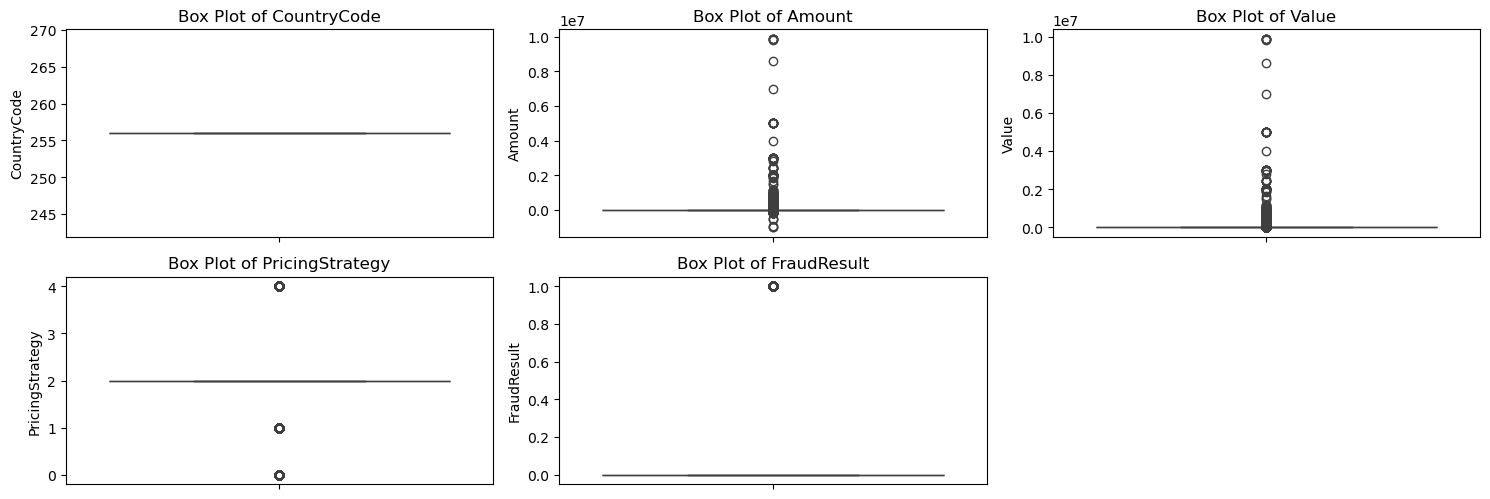

In [15]:
# Function to detect outliers using box plots
def plot_outliers(df):
    numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
    plt.figure(figsize=(15, 10))

    for i, col in enumerate(numerical_cols, 1):
        plt.subplot(4, 3, i)  # Adjust based on the number of numerical columns
        sns.boxplot(data=df, y=col)
        plt.title(f'Box Plot of {col}')
    
    plt.tight_layout()
    plt.savefig('plots/outlier.png', dpi=300) 

    plt.show()
    plt.close()

plot_outliers(df)

### 2.8 Relationship Between Features and FraudResult

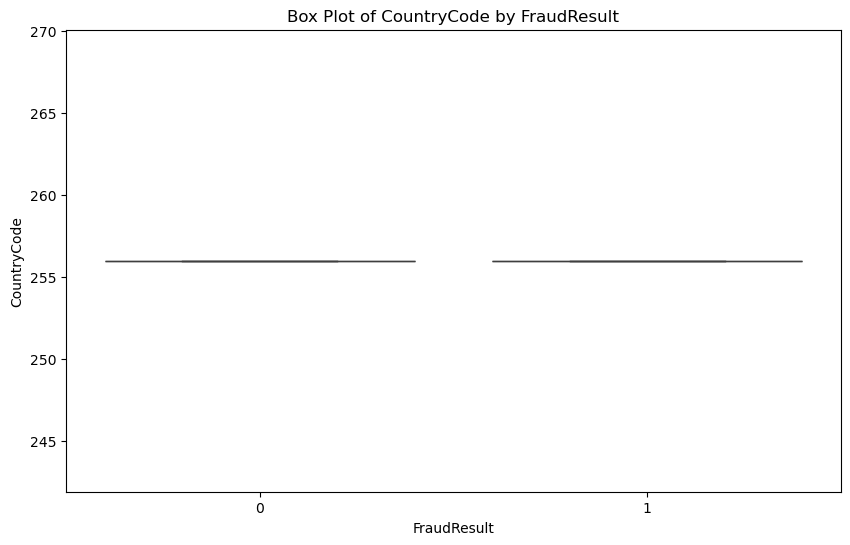

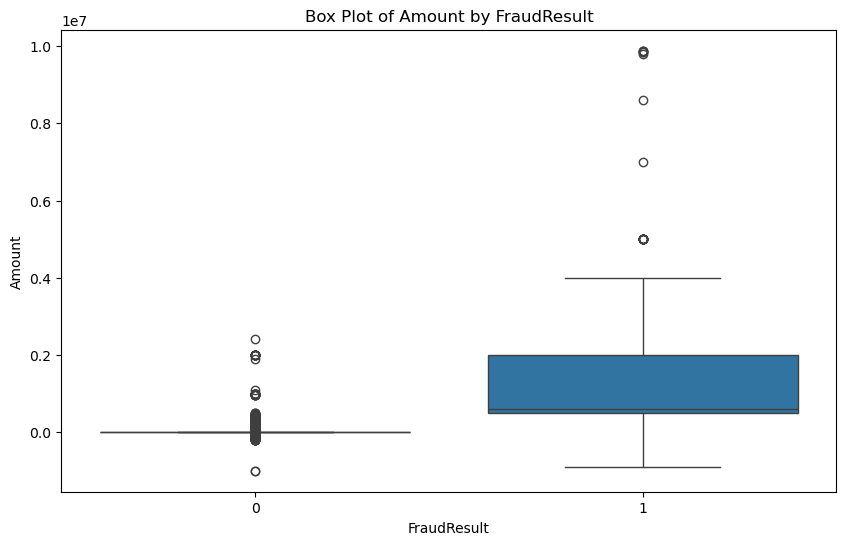

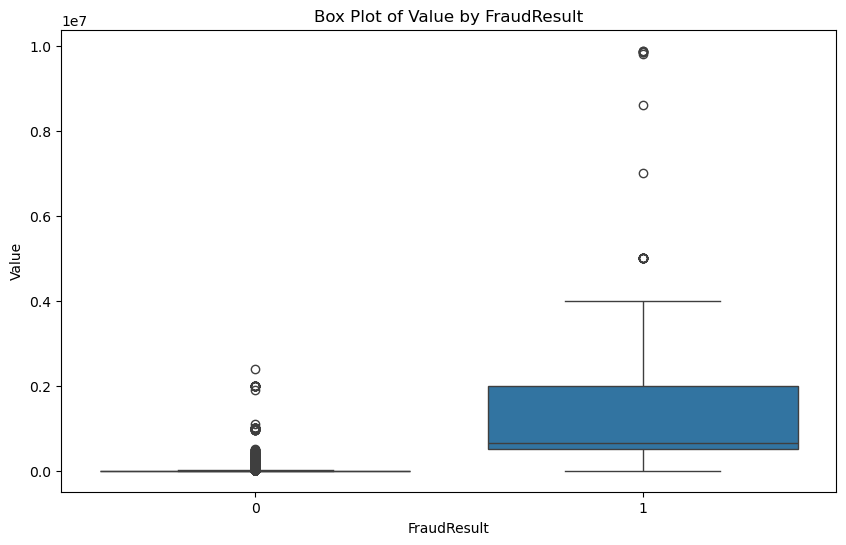

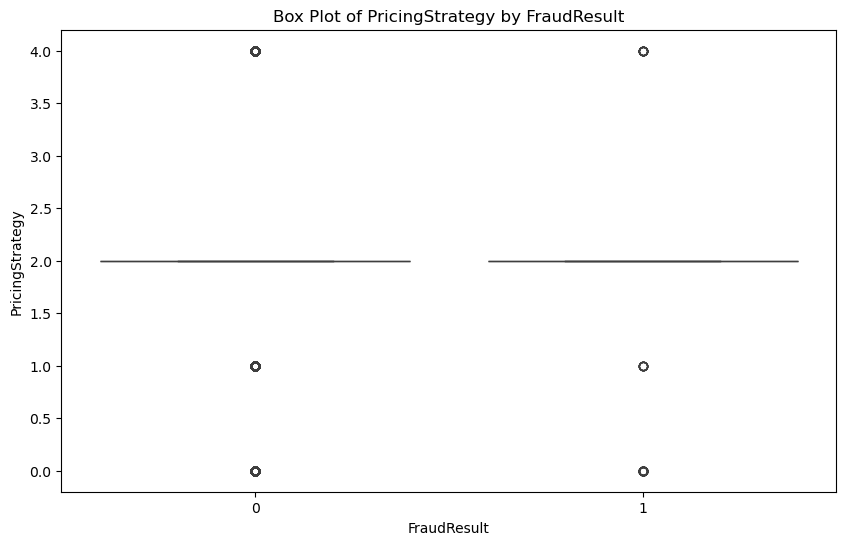

In [17]:
# Box Plot to identify the relationship between features and FraudResult
def plot_boxplots(df, target_col='FraudResult'):
    numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
    
    for col in numerical_cols:
        if col != target_col:  # Skip the target column
            plt.figure(figsize=(10, 6))
            sns.boxplot(x=target_col, y=col, data=df)
            plt.title(f'Box Plot of {col} by {target_col}')
            plt.xlabel(target_col)
            plt.ylabel(col)
            plt.savefig(f'plots/{col}.png', dpi=300) 
            plt.show()
            plt.close()
plot_boxplots(df)